<a href="https://colab.research.google.com/github/SMSajadi99/Nerual-Network/blob/main/introduction_to_pca_image_compression_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Principal Component Analysis

PCA is a very powerful tool that should be present in the arsenal of every serious Data Scientist. Sooner or later, you WILL run into a situation where PCA could make your life easier. It is one of those elegant ideas from Linear Algebra that have a host of applications in -

1. Dimensionality reduction/data compression
2. Data visualization and Exploratory Data Analysis
3. Create uncorrelated features/variables that can be an input to a prediction model
4. Uncovering latent variables/themes/concepts
5. Noise reduction in the dataset

**Example - PCA on MNIST dataset - reduced to 2 dimensions for visualization**  
The MNIST dataset has 784 dimensions for each example - 784 pixels; of course, you can't visualize 784D plots as is.  
With PCA, you can already see the digits forming natural groups in 2D space, although with some overlap. But the fact that you can reduce a 784 dimensional data to 2D and be able to visualize, is amazing in itself.

<img src="https://i.stack.imgur.com/9wmJ2.png" width="350px">
Image soure: Stack overflow


In this notebook, we'll learn how to use PCA for Data compression/ Dimensionality reduction. Specifically, using PCA for image compression.

### Defining Principal Component Analysis in simple terms
PCA is a statistical procedure to convert observations of possibly correlated variables/features into ‘Principal Components’ that are –
- Uncorrelated with/independent of each other
- Constructed to capture maximum information/variance in the data
- Linear combinations of the original variables

**PCA is an unsupervised technique: there is no ‘Y’ or dependent/response variable.**

### How does PCA work?
Or, how are the Principal components found?  
The first Pricipal Component is found such that it explains the maximum variance in the data.  
The second attempts to find variance incremental to the first, while being **orthogonal** to the first.
And so on ... this process continues to find all the principal components (min of #rows, #columns).  

<img src="https://storage.googleapis.com/kagglesdsdata/datasets/321157/675759/PCA%20working.png?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1568281657&Signature=OkSTjLSPaxBl92qjFEB6p6u%2BZQ3bHPERjVXI5cQOJuLchfw7T223TflxK2abMICNjFNmXt7TtfF2P2q29I30n0l7LLoSYqyuiXACxyxquf95T%2BLFk8GGzrQRdPgEJzPyDEUtenvPV88ZWdbgUWDHta27YnbA%2FsMgkoD65FRnpxR6ec0AtKpiQNir5KFTzmtCRAMvPeru1UcnpFqNl6FHTaEeP%2BmgpjDmgF%2Bp6%2FLuBp4wd8BtBcYmhUCdDFD7jgogd%2BN9ntb7bKDeYtxQ1Wdzedu0BKQejo8%2B86wwgpvl95yNN802n64Ogv1qUW16BtVnHxbuWpfSILKJj8hqEV0Xow%3D%3D">

This is a very brief, very simplified, one of the many formulations of PCA. For more details and more math on how PCA works, you could refer to the [Wikipedia page here](https://en.wikipedia.org/wiki/Principal_component_analysis), it has pretty good explanation.  


### Using PCA for image compression
An image can be treated as a matrix - a grid of pixels, with values being the pixel intensities.   
The basic steps we'll follow:
- Apply PCA on the image matrix to reduce the dimensionality to a smaller number of principal components (PCs). This is lossy compression, as we are discarding some of the information.
- To assess how much visual information we retained, we'll reconstruct the image from the limited number of PC.
- We'll see how good the reconstructed images are for different number of selecte components.

#### With that, let's get our hands dirty!

Importing the required libraries, importing the image as a matrix, and displaying the image.

(845, 564, 3)


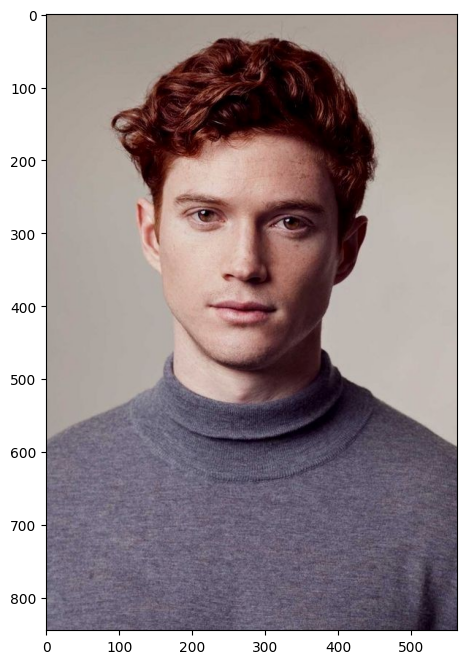

In [1]:
import numpy as np
from matplotlib.image import imread
import matplotlib.pyplot as plt

image_raw = imread("/content/face.jpg")
print(image_raw.shape)

# Displaying the image
plt.figure(figsize=[12,8])
plt.imshow(image_raw)

A beautiful image of a handsome man, enjoying the view at an exotic location. Just a pic from my vacation ;)

**About the image - **  
The image is a colour image i.e. has data in 3 channels- Red, Green, Blue.   
Hence the shape of the data - 780 x 1040 x 3  - it is essentially is 780 x 1040 matrix for each channel.

While we could work with 3 channels, simply working with 3 matrices, for the purpose of demonstrating and for avoiding distraction from the core lesson, I'll convert the image to Black & White (greyscale, actually).  

**Converting to greyscale** -
1. summing RGBs channel values for each pixel
2. capping values to 1

We'll plot the matrix as a greyscale image.

(845, 564)
1.0


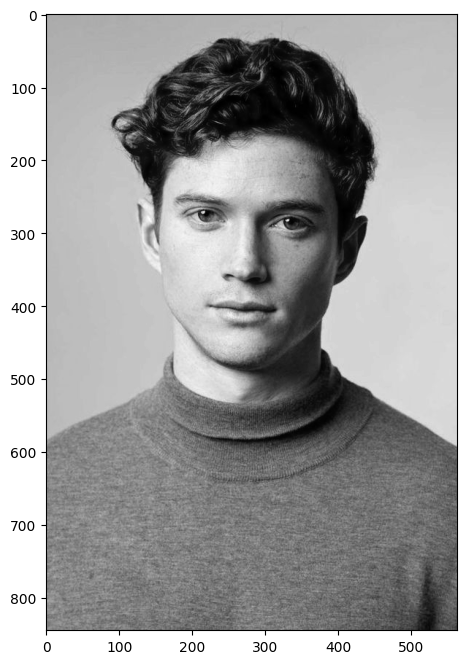

In [2]:
image_sum = image_raw.sum(axis=2)
print(image_sum.shape)

image_bw = image_sum/image_sum.max()
print(image_bw.max())

plt.figure(figsize=[12,8])
plt.imshow(image_bw, cmap=plt.cm.gray)

### Performing PCA on the image
 - We'll perform PCA on the matrix with all the components
 - We'll then look at the scree-plot to assess how many components we could retain and how much cumulative variance they capture
 - We'll pick a suitable number of components to represent the image for compression

Number of components explaining 95% variance: 16


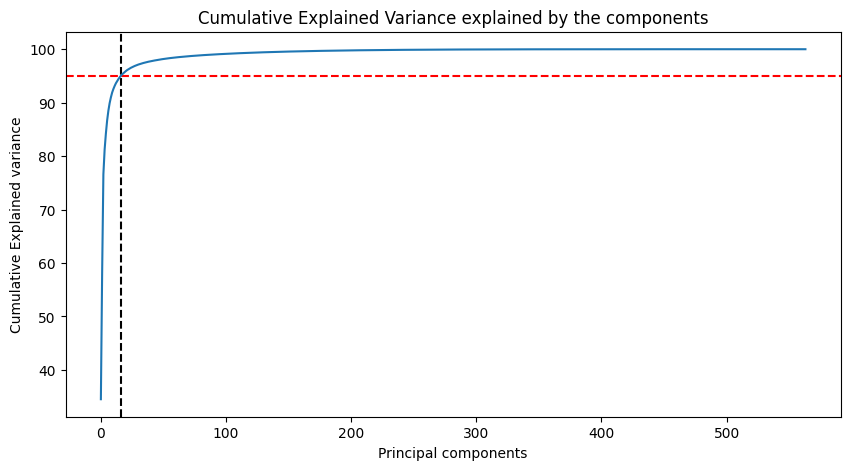

In [3]:
from sklearn.decomposition import PCA, IncrementalPCA
pca = PCA()
pca.fit(image_bw)

# Getting the cumulative variance

var_cumu = np.cumsum(pca.explained_variance_ratio_)*100

# How many PCs explain 95% of the variance?
k = np.argmax(var_cumu>95)
print("Number of components explaining 95% variance: "+ str(k))
#print("\n")

plt.figure(figsize=[10,5])
plt.title('Cumulative Explained Variance explained by the components')
plt.ylabel('Cumulative Explained variance')
plt.xlabel('Principal components')
plt.axvline(x=k, color="k", linestyle="--")
plt.axhline(y=95, color="r", linestyle="--")
ax = plt.plot(var_cumu)

**Looks like 38 components, instead of 784 pixels, can explain 95% of the variance in the image!**  
38 instead of 784 - whoah!    

Let's reconstruct the image using only 38 components and see if the reconstructed image is visually very different from the original.

### Reconstructing the b/w image with the limited number of components (38)
1. First, we'll use the `fit_transform` method from the IncrementalPCA module to first find the 38 PCs and transform and represent the data in those 38 new components/columns.  
2. Next, we'll reconstruct the original matrix from these 38 components using the `inverse_transform` method.  

We'll then plot the image to visually assess the quality of it.

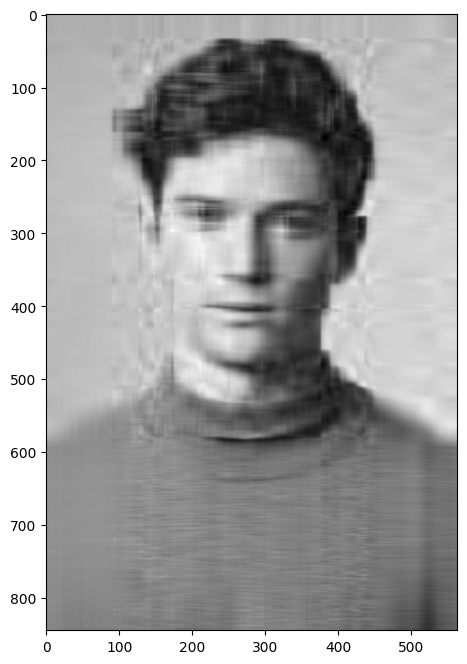

In [4]:
ipca = IncrementalPCA(n_components=k)
image_recon = ipca.inverse_transform(ipca.fit_transform(image_bw))

# Plotting the reconstructed image
plt.figure(figsize=[12,8])
plt.imshow(image_recon,cmap = plt.cm.gray)

Well, for 95% variance, we expected a clearer image, didn't we? Note that we got all the major elements captured for sure - you can still very well identify objects.

What's missing is the clarity - well, maybe it's the finer details in the visuals that make an image appealing and clear.

#### Let's try out a different value of k - 150 components  

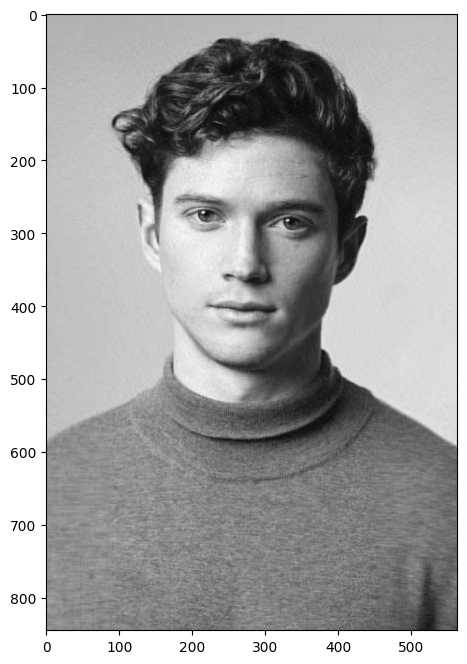

In [5]:
# Function to reconstruct and plot image for a given number of components

def plot_at_k(k):
    ipca = IncrementalPCA(n_components=k)
    image_recon = ipca.inverse_transform(ipca.fit_transform(image_bw))
    plt.imshow(image_recon,cmap = plt.cm.gray)


k = 150
plt.figure(figsize=[12,8])
plot_at_k(100)

Much better! Just a little bit grainy, but the details are all there. On a smaller resolution, you probably won't be able to detect the differences from the original greyscale image very easily.

### Reconstructing and plotting for different number of components
- we'll try out different number of components, begining from 10, ending at 250
- we'll reconstruct the image at each `k` and plot the images

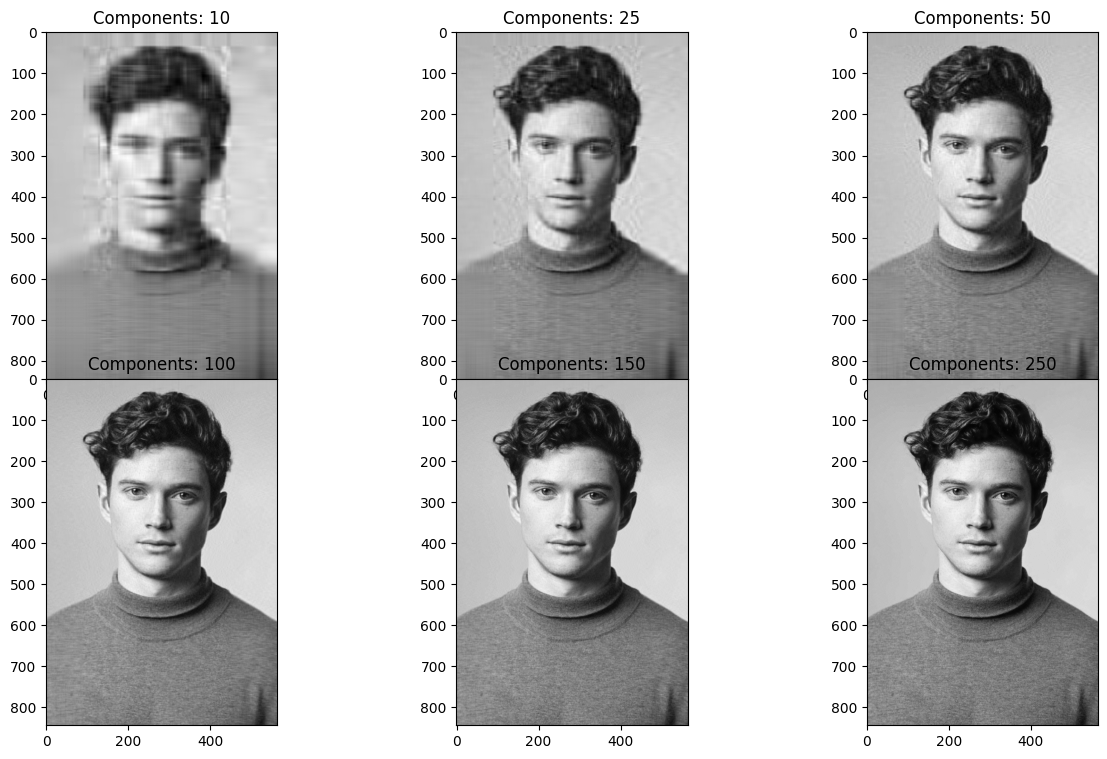

In [6]:
ks = [10, 25, 50, 100, 150, 250]

plt.figure(figsize=[15,9])

for i in range(6):
    plt.subplot(2,3,i+1)
    plot_at_k(ks[i])
    plt.title("Components: "+str(ks[i]))

plt.subplots_adjust(wspace=0.2, hspace=0.0)
plt.show()

We'll looks like after 150, most of the reconstructed images are indistinguishable from the original greyscale. Even 150 components instead of 784 columns is significant compression.  

Well, so that was it for a brief introduction to PCA. We saw how we can -
1. Implement PCA in python
2. Choose the number of components using a scree plot
3. Reconstruct the original data from the components   

Now, PCA is not the only dimensionality reduction technique - there are **plenty** more. Some notable ones being -
- ICA (Independent Component Analysis)
- Manifold Learning (IsoMap, LLE)
- t-SNE

These overcome some of the shortcomings of PCA, but there are tradeoffs.    

PCA should be one technique that should be in the arsenal of every Data Scientist. While it does have some drawbacks, the idea of PCA is pretty powerful, and PCA is pretty much a ‘default’ method for several applications owing to its efficiency, elegant geometrical interpretation, and simplicity.


**Happy learning!**